**Course website**: http://lagex.github.io/geofisica2

**Note**: This notebook is part of the course "Geofísica 2" of Geology program of the 
[Universidade do Estado do Rio de Janeiro](http://www.uerj.br/). 
All content can be freely used and adapted under the terms of the 
[Creative Commons Attribution 4.0 International License](http://creativecommons.org/licenses/by/4.0/).

![Creative Commons License](https://i.creativecommons.org/l/by/4.0/88x31.png)

Esse documento que você está usando é um [IPython notebook](http://ipython.org/notebook.html). É um documento interativo que mistura texto (como esse), código (como abaixo), e o resultado de executar o código (que pode ser números, texto, figuras, videos, etc).

# Prática 8 - Sísmica de reflexão: wavelets, convolução e resolução



## Preparação

Rode a célula abaixo para carregar as componentes necessárias para fazer as simulações. Não se preocupe se aparecer um `:0: FutureWarning: IPython widgets are experimental and may change in the future.` abaixo. Isso é consequência de utilizar tecnologia de ponta.

In [40]:
%matplotlib inline
from __future__ import division
import time
import numpy as np
import matplotlib.pyplot as plt
from IPython.html import widgets
from IPython import display
from fatiando import utils
from fatiando.seismic import conv
from fatiando.seismic.wavefd import Ricker
from fatiando.vis import mpl
import fatiando
plt.rc('font', size=10)

In [41]:
print(fatiando.__version__)

0.3-257-gef3ff78


## Convolução

$$
S(t) = R(t) \ast W(t) = \int\limits_{-\infty}^{+\infty} R(\tau)W(t - \tau)d\tau
$$

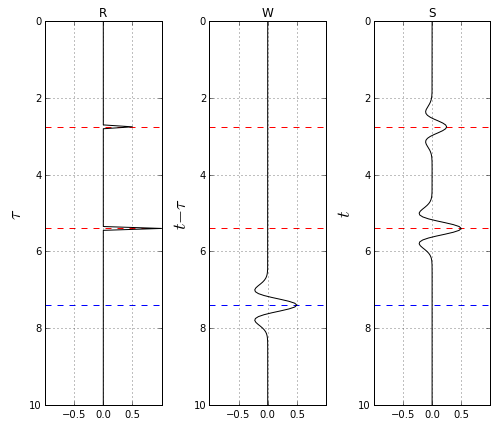

In [60]:
tempos = np.linspace(0, 10, 201)
reflex = np.zeros_like(tempos)
reflex[55] = 0.5
reflex[108] = 1
def convolucao(t):    
    sinal = np.zeros_like(tempos)
    wave = Ricker(0.5, 1)
    for i, j in enumerate(tempos[tempos <= t]):
        w = wave(j - tempos)
        sinal[i] = (w*reflex).sum()
    fig, axes = plt.subplots(1, 3, figsize=(7, 6))
    for ax, data in zip(axes, [reflex, w, sinal]):
        ax.plot(data, tempos, '-k')
        ax.invert_yaxis()
        ax.set_xlim(-1., 1.)
        ax.set_xticks([-0.5, 0, 0.5])
        ax.grid()
        ax.hlines(t, -1, 1, colors='b', linestyles='--')
        ax.hlines(tempos[reflex > 0], -1, 1, colors='r', linestyles='--')
    for ax, label in zip(axes, [r"$\tau$", r"$t - \tau$", r"$t$"]):
        ax.set_ylabel(label, fontsize=18)
    for ax, title in zip(axes, [r"R", r"W", r"S"]):
        ax.set_title(title)
    plt.tight_layout()
widgets.interactive(convolucao, t=widgets.FloatSlider(min=0, max=tempos.max(), step=0.2, value=0))

## Resolução